In [1]:
import os
os.getcwd()

'/home/jin/xcy/task3'

In [2]:
!git clone -b tutorials https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 36605, done.
remote: Counting objects: 100% (1256/1256), done.
remote: Compressing objects: 100% (701/701), done.
remote: Total 36605 (delta 694), reused 920 (delta 541), pack-reused 35349
Receiving objects: 100% (36605/36605), 56.85 MiB | 4.43 MiB/s, done.
Resolving deltas: 100% (25629/25629), done.
Checking connectivity... done.


## 数据集下载

In [3]:
!wget https://download.openmmlab.com/mmyolo/data/balloon_dataset.zip

--2023-06-11 01:00:40--  https://download.openmmlab.com/mmyolo/data/balloon_dataset.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 117.161.52.189, 120.201.232.213, 117.161.52.190, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|117.161.52.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38741381 (37M) [application/zip]
Saving to: ‘balloon_dataset.zip’

balloon_dataset.zip 100%[===================>]  36.95M  11.2MB/s    in 3.5s    

2023-06-11 01:00:45 (10.6 MB/s) - ‘balloon_dataset.zip’ saved [38741381/38741381]



In [4]:
!unzip balloon_dataset.zip -d balloon_dataset && rm balloon_dataset.zip 

Archive:  balloon_dataset.zip
   creating: balloon_dataset/balloon/
   creating: balloon_dataset/balloon/train/
  inflating: balloon_dataset/balloon/train/via_region_data.json  
   creating: balloon_dataset/__MACOSX/
   creating: balloon_dataset/__MACOSX/balloon/
   creating: balloon_dataset/__MACOSX/balloon/train/
  inflating: balloon_dataset/__MACOSX/balloon/train/._via_region_data.json  
  inflating: balloon_dataset/balloon/train/53500107_d24b11b3c2_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._53500107_d24b11b3c2_b.jpg  
  inflating: balloon_dataset/balloon/train/120853323_d4788431b9_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._120853323_d4788431b9_b.jpg  
  inflating: balloon_dataset/balloon/train/126700562_8e27720147_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._126700562_8e27720147_b.jpg  
  inflating: balloon_dataset/balloon/train/145053828_e0e748717c_b.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._145053828_e0e7487

  inflating: balloon_dataset/balloon/train/15290896925_884ab33fd3_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._15290896925_884ab33fd3_k.jpg  
  inflating: balloon_dataset/balloon/train/15331928994_d5b82eb368_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._15331928994_d5b82eb368_k.jpg  
  inflating: balloon_dataset/balloon/train/15717689633_5f7f78c28e_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._15717689633_5f7f78c28e_k.jpg  
  inflating: balloon_dataset/balloon/train/16435593892_2aa8118f4a_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._16435593892_2aa8118f4a_k.jpg  
  inflating: balloon_dataset/balloon/train/17156759330_5af4f5a5b8_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._17156759330_5af4f5a5b8_k.jpg  
  inflating: balloon_dataset/balloon/train/17178818589_16e58fc1e5_k.jpg  
  inflating: balloon_dataset/__MACOSX/balloon/train/._17178818589_16e58fc1e5_k.jpg  
  inflating: balloon_dataset/balloon/train/188

## 数据集可视化

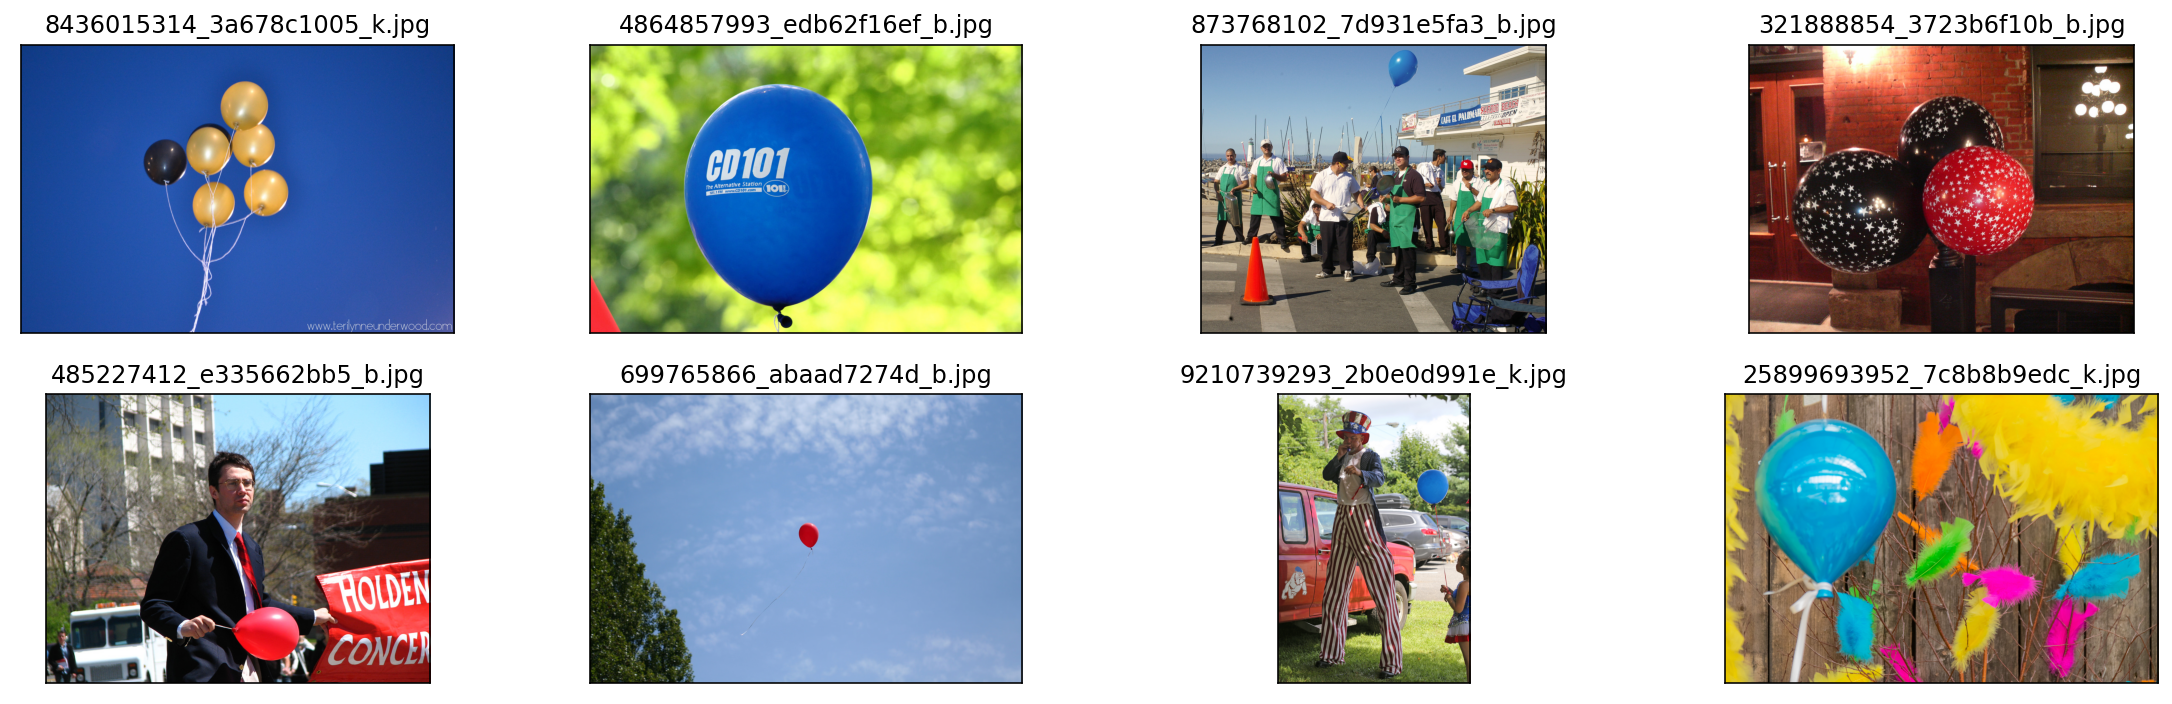

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

original_images = []
images = []
texts = []
plt.figure(figsize=(16, 5))

image_paths= [filename for filename in os.listdir('balloon_dataset/balloon/train/')][:8]

for i,filename in enumerate(image_paths):
    name = os.path.splitext(filename)[0]

    image = Image.open('balloon_dataset/balloon/train/'+filename).convert("RGB")
  
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

## 参考[https://github.com/CrabBoss-lab/openmmlab-Camp/blob/master/03-mmdetection-task/3-json2coco.ipynb](https://github.com/CrabBoss-lab/openmmlab-Camp/blob/master/03-mmdetection-task/3-json2coco.ipynb)将将原始json文件的格式转coco格式
### 训练集

In [6]:
import json
import re
from collections import defaultdict
import cv2
import os

# 读取JSON文件
with open('balloon_dataset/balloon/train/via_region_data.json') as f:
    annotations = json.load(f)

# 初始化COCO格式字典
coco_dict = defaultdict(list)
coco_dict['info'] = {}
coco_dict['licenses'] = []
coco_dict['categories'] = []
coco_dict['images'] = []
coco_dict['annotations'] = []

# 添加info信息
coco_dict['info']['version'] = '1.0'
coco_dict['info']['description'] = 'Balloon Dataset'
coco_dict['info']['year'] = 2023
coco_dict['info']['contributor'] = 'YUJUNYU'
coco_dict['info']['date_created'] = '2023-06-09'

# 添加categories信息
category_id = 1
category = {'id': category_id, 'name': 'balloon', 'supercategory': 'object'}
coco_dict['categories'].append(category)

# 遍历每个图像的注释信息
annotation_id = 1
for image_id, image_info in annotations.items():
    # 从image_id中提取出正确的图像ID
    match = re.search(r'(\d+)_.*', image_id)
    if match:
        image_id = match.group(1)
    else:
        continue
    
    # 获取图像的文件名和大小
    filename = image_info['filename']
    size = image_info['size']
    # 获取图像的height和width
    img = cv2.imread(os.path.join('balloon_dataset/balloon/train/', filename))
    height, width, _ = img.shape
    # print(filename,height,width)
    
    # 添加图像信息
    image = {'id': int(image_id), 'file_name': filename, 'width': width, 'height': height}
    coco_dict['images'].append(image)
    
    # 获取多边形注释信息
    regions = image_info['regions']
    for region_id, region_info in regions.items():
        # 获取多边形顶点坐标
        x = region_info['shape_attributes']['all_points_x']
        y = region_info['shape_attributes']['all_points_y']
        points = list(zip(x, y))
        
        # 计算多边形的边界框
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)
        width = xmax - xmin
        height = ymax - ymin
        
        # 添加注释信息
        annotation = {'id': annotation_id, 'image_id': int(image_id), 'category_id': category_id, 'segmentation': [points], 'area': width * height, 'bbox': [xmin, ymin, width, height], 'iscrowd': 0}
        coco_dict['annotations'].append(annotation)
        annotation_id += 1

# 保存COCO格式文件
with open('balloon_dataset/balloon/train/balloon_train.json', 'w') as f:
    json.dump(coco_dict, f)

print('success！')

success！


### 测试集

In [8]:
import json
import re
from collections import defaultdict
import cv2
import os

# 读取JSON文件
with open('balloon_dataset/balloon/val/via_region_data.json') as f:
    annotations = json.load(f)

# 初始化COCO格式字典
coco_dict = defaultdict(list)
coco_dict['info'] = {}
coco_dict['licenses'] = []
coco_dict['categories'] = []
coco_dict['images'] = []
coco_dict['annotations'] = []

# 添加info信息
coco_dict['info']['version'] = '1.0'
coco_dict['info']['description'] = 'Balloon Dataset'
coco_dict['info']['year'] = 2023
coco_dict['info']['contributor'] = 'YUJUNYU'
coco_dict['info']['date_created'] = '2023-06-09'

# 添加categories信息
category_id = 1
category = {'id': category_id, 'name': 'balloon', 'supercategory': 'object'}
coco_dict['categories'].append(category)

# 遍历每个图像的注释信息
annotation_id = 1
for image_id, image_info in annotations.items():
    # 从image_id中提取出正确的图像ID
    match = re.search(r'(\d+)_.*', image_id)
    if match:
        image_id = match.group(1)
    else:
        continue
    
    # 获取图像的文件名和大小
    filename = image_info['filename']
    size = image_info['size']
    # 获取图像的height和width
    img = cv2.imread(os.path.join('balloon_dataset/balloon/val/', filename))
    height, width, _ = img.shape
    # print(filename,height,width)
    
    
    # 添加图像信息
    image = {'id': int(image_id), 'file_name': filename, 'width': width, 'height': height}
    coco_dict['images'].append(image)
    
    # 获取多边形注释信息
    regions = image_info['regions']
    for region_id, region_info in regions.items():
        # 获取多边形顶点坐标
        x = region_info['shape_attributes']['all_points_x']
        y = region_info['shape_attributes']['all_points_y']
        points = list(zip(x, y))
        
        # 计算多边形的边界框
        xmin = min(x)
        xmax = max(x)
        ymin = min(y)
        ymax = max(y)
        width = xmax - xmin
        height = ymax - ymin
        
        # 添加注释信息
        annotation = {'id': annotation_id, 'image_id': int(image_id), 'category_id': category_id, 'segmentation': [points], 'area': width * height, 'bbox': [xmin, ymin, width, height], 'iscrowd': 0}
        coco_dict['annotations'].append(annotation)
        annotation_id += 1

# 保存COCO格式文件
with open('balloon_dataset/balloon/val/balloon_val.json', 'w') as f:
    json.dump(coco_dict, f)

print('success！')

success！


## 数据集标签可视化

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


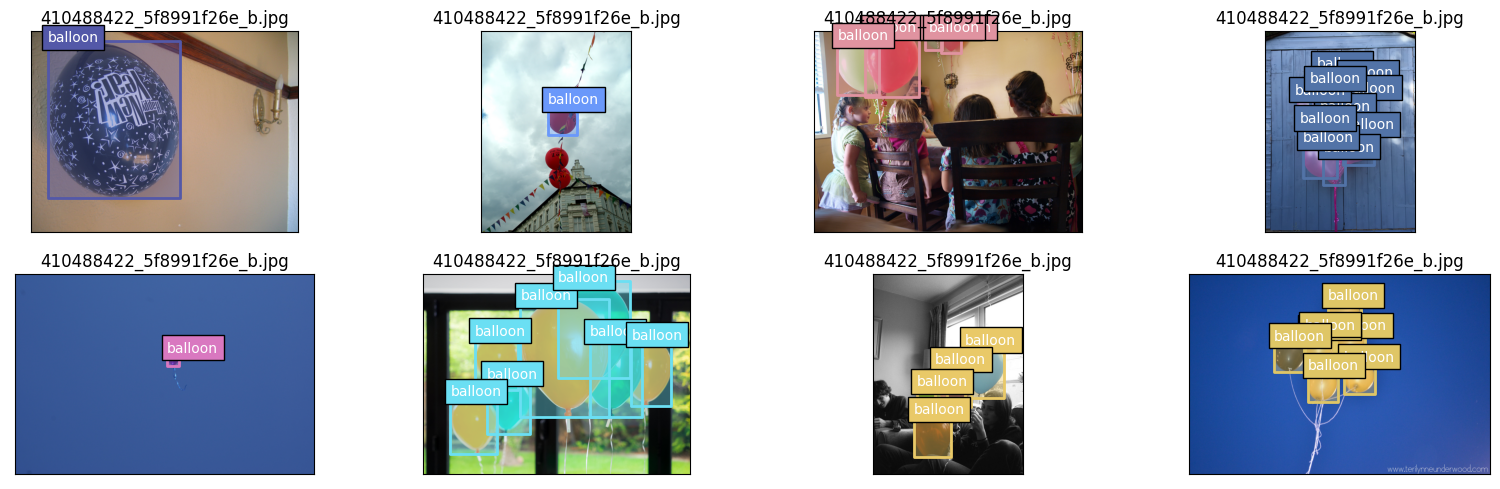

In [11]:
from pycocotools.coco import COCO
import numpy as np
import os.path as osp
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from PIL import Image
def apply_exif_orientation(image):
    _EXIF_ORIENT = 274
    if not hasattr(image, 'getexif'):
        return image

    try:
        exif = image.getexif()
    except Exception:
        exif = None

    if exif is None:
        return image

    orientation = exif.get(_EXIF_ORIENT)

    method = {
        2: Image.FLIP_LEFT_RIGHT,
        3: Image.ROTATE_180,
        4: Image.FLIP_TOP_BOTTOM,
        5: Image.TRANSPOSE,
        6: Image.ROTATE_270,
        7: Image.TRANSVERSE,
        8: Image.ROTATE_90,
    }.get(orientation)
    if method is not None:
        return image.transpose(method)
    return image


def show_bbox_only(coco, anns, show_label_bbox=True, is_filling=True):
    """Show bounding box of annotations Only."""
    if len(anns) == 0:
        return

    ax = plt.gca()
    ax.set_autoscale_on(False)

    image2color = dict()
    for cat in coco.getCatIds():
        image2color[cat] = (np.random.random((1, 3)) * 0.7 + 0.3).tolist()[0]

    polygons = []
    colors = []

    for ann in anns:
        color = image2color[ann['category_id']]
        bbox_x, bbox_y, bbox_w, bbox_h = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y + bbox_h],
                [bbox_x + bbox_w, bbox_y + bbox_h], [bbox_x + bbox_w, bbox_y]]
        polygons.append(Polygon(np.array(poly).reshape((4, 2))))
        colors.append(color)

        if show_label_bbox:
            label_bbox = dict(facecolor=color)
        else:
            label_bbox = None

        ax.text(
            bbox_x,
            bbox_y,
            '%s' % (coco.loadCats(ann['category_id'])[0]['name']),
            color='white',
            bbox=label_bbox)

    if is_filling:
        p = PatchCollection(
            polygons, facecolor=colors, linewidths=0, alpha=0.4)
        ax.add_collection(p)
    p = PatchCollection(
        polygons, facecolor='none', edgecolors=colors, linewidths=2)
    ax.add_collection(p)

    
coco = COCO('balloon_dataset/balloon/train/balloon_train.json')
image_ids = coco.getImgIds()
np.random.shuffle(image_ids)

plt.figure(figsize=(16, 5))

# 只可视化 8 张图片
for i in range(8):
    image_data = coco.loadImgs(image_ids[i])[0]
    image_path = osp.join('balloon_dataset/balloon/train',image_data['file_name'])
    annotation_ids = coco.getAnnIds(
            imgIds=image_data['id'], catIds=[], iscrowd=0)
    annotations = coco.loadAnns(annotation_ids)
    
    ax = plt.subplot(2, 4, i+1)
    image = Image.open(image_path).convert("RGB")
    
    # 这行代码很关键，否则可能图片和标签对不上
    image=apply_exif_orientation(image)
    
    ax.imshow(image)
    
    show_bbox_only(coco, annotations)
    
    plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])
        
plt.tight_layout()